In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation ,Dropout
from keras.layers import LSTM
from scipy.io import savemat
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

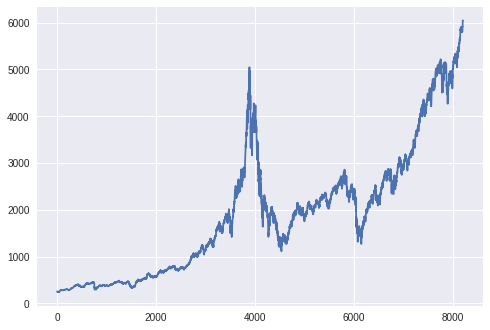

In [0]:
data_whole=pd.read_csv('drive/My Drive/vallabhan/Nasdaq.csv')
feature_cols = list(data_whole.columns[:-1])
target_col = data_whole.columns[-1]
X = data_whole[feature_cols].values
y = data_whole[target_col].values
#data=data_whole['ADBE']
#data.dropna(inplace=True)
plt.plot(y)
plt.show()


In [0]:
np.random.seed(7)
scaler_x = MinMaxScaler(feature_range=(0,3))
X = scaler_x.fit_transform(X)
X = pd.DataFrame(X)
scaler_y=MinMaxScaler()
y=scaler_y.fit_transform(y.reshape(y.shape[0],1))
y=pd.DataFrame(y)
train_size = int(len(X) * 0.6)
test_size = len(X) - train_size
trainX, testX = X.values[0:train_size,:], X.values[train_size:len(X),:]
trainY, testY = y.values[0:train_size], y.values[train_size:len(X)]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(len(trainX), len(testX))

(4918, 3280)


In [0]:
model = Sequential()
model.add(LSTM(20, input_shape=(1, 4),return_sequences = False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY,validation_split=0.1, epochs=100, batch_size=10, verbose=2)

Train on 4426 samples, validate on 492 samples
Epoch 1/100
 - 2s - loss: 6.9420e-04 - val_loss: 1.2761e-04
Epoch 2/100
 - 1s - loss: 2.5594e-04 - val_loss: 1.7227e-04
Epoch 3/100
 - 1s - loss: 2.5253e-04 - val_loss: 1.3158e-04
Epoch 4/100
 - 1s - loss: 2.4789e-04 - val_loss: 1.6050e-04
Epoch 5/100
 - 1s - loss: 2.5888e-04 - val_loss: 1.3347e-04
Epoch 6/100
 - 1s - loss: 2.4811e-04 - val_loss: 1.2968e-04
Epoch 7/100
 - 1s - loss: 2.5437e-04 - val_loss: 1.3757e-04
Epoch 8/100
 - 1s - loss: 2.4836e-04 - val_loss: 1.2646e-04
Epoch 9/100
 - 1s - loss: 2.5486e-04 - val_loss: 1.6910e-04
Epoch 10/100
 - 1s - loss: 2.4103e-04 - val_loss: 3.9271e-04
Epoch 11/100
 - 1s - loss: 2.6176e-04 - val_loss: 1.2902e-04
Epoch 12/100
 - 1s - loss: 2.5436e-04 - val_loss: 2.3620e-04
Epoch 13/100
 - 1s - loss: 2.5305e-04 - val_loss: 1.7652e-04
Epoch 14/100
 - 1s - loss: 2.4718e-04 - val_loss: 1.4024e-04
Epoch 15/100
 - 1s - loss: 2.5397e-04 - val_loss: 1.2588e-04
Epoch 16/100
 - 1s - loss: 2.4823e-04 - val_los

In [0]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler_y.inverse_transform(trainPredict)
trainY = scaler_y.inverse_transform(trainY)
testPredict = scaler_y.inverse_transform(testPredict)
testY = scaler_y.inverse_transform(testY)
lst={}
lst['trainPredict']=trainPredict
lst['testPredict']=testPredict
lst['trainY']=trainY
lst['testY']=testY
savemat('lstm.mat',lst)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 84.67 RMSE
Test Score: 145.71 RMSE


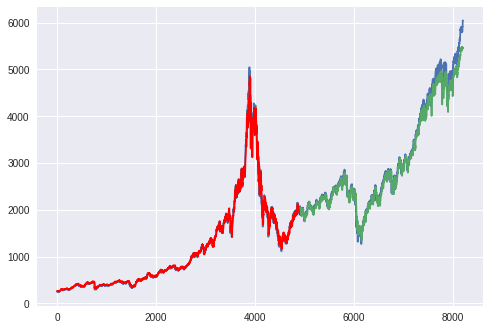

In [0]:
trainPredictPlot = np.empty_like(y)
trainPredictPlot[:] = np.nan
trainPredictPlot[:len(trainPredict)] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(y)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict):len(y)]= testPredict
# plot baseline and predictions
plt.plot(scaler_y.inverse_transform(y))
plt.plot(trainPredict,'r')
plt.plot(testPredictPlot)
plt.show()